# Preparation

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

In [6]:
# load data
league_data_dir = os.getcwd() + '/data/leaguedata'
all_data = []
for filename in os.listdir(league_data_dir):
    if not filename.startswith("20"):
        continue
    league = "Premier League" if "PremierLeague" in filename else "La Liga" if "LaLiga" in filename else "Bundesliga" if "Bundesliga" in filename else "SerieA" if "SerieA" in filename else "Ligue1"
    year = 2017 if "2017" in filename else 2018 if "2018" in filename else 2019 if "2019" in filename else "2020"
    with open(os.path.join(league_data_dir, filename)) as f:
        for line in f:
            data = json.loads(line)
            merged_dict = {
                'name': data['name'] if 'name' in data else None, 
                'age': data['age'] if 'age' in data else None, 
                'nationality': data['nationality'] if 'nationality' in data else None,
                'height': data['height'] if 'height' in data else None,
                'weight': data['weight'] if 'weight' in data else None,
                'team': data['team'] if 'team' in data else None,
                'position': data['position'] if 'position' in data else None,
                'league': league,
                'year': year
            }
            
            merged_dict.update(data['general_stats'] if 'general_stats' in data else {})
            merged_dict.update(data['offensive_stats'] if 'offensive_stats' in data else {})
            merged_dict.update(data['passing_stats'] if 'passing_stats' in data else {})
            merged_dict.update(data['defensive_stats'] if 'defensive_stats' in data else {})
            all_data.append(merged_dict)
player_data = pd.DataFrame(all_data)

# drop rows with NaN (375 out of 6267)
player_data = player_data.dropna()
player_data

,name,age,nationality,height,weight,team,position,league,year,games,...,PPA,CrsPA,Prog,Tkl,TklW,Past,Press,Succ,Blocks,Int
0,Lukasz Piszczek,32,Poland,184.0,79.0,Borussia Dortmund,DF,Bundesliga,2017,24.0,...,27,12,119,42,24,26,308,99,45,29
1,Sven Bender,28,Germany,186.0,80.0,Bayer Leverkusen,DF,Bundesliga,2017,29.0,...,3,0,89,43,30,18,263,102,64,27
2,Lars Bender,28,Germany,185.0,81.0,Bayer Leverkusen,DF,Bundesliga,2017,21.0,...,19,6,103,57,31,29,371,102,37,15
3,Aaron Hunt,31,Germany,183.0,73.0,Hamburger SV,MF,Bundesliga,2017,29.0,...,31,5,97,30,22,32,484,135,30,14
4,Marcel Heller,31,Germany,175.0,70.0,Augsburg,FW,Bundesliga,2017,24.0,...,15,9,23,33,24,25,291,62,18,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,Giovani Lo Celso,22,Argentina,177.0,68.0,Real Betis,MF,La Liga,2018,32.0,...,47,2,124,55,46,32,500,137,36,10
6262,Jony,27,Spain,179.0,76.0,Alaves,MF,La Liga,2018,36.0,...,60,35,85,27,12,39,491,98,42,24
6263,Marc Cucurella,20,Spain,172.0,66.0,Eibar,MF,La Liga,2018,31.0,...,29,14,68,44,39,16,689,223,45,15
6264,Stanislav Lobotka,24,Slovakia,170.0,68.0,Celta Vigo,MF,La Liga,2018,31.0,...,12,1,106,42,34,35,670,151,23,26


# Boxplot Analysis

In [7]:
leagues = list(player_data.league.unique())
height_data = [list(player_data[player_data['league'] == l].height) for l in leagues]

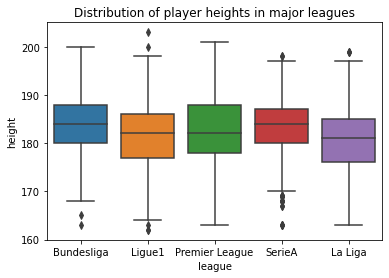

In [8]:
sns.boxplot(data = player_data, x = 'league', y='height')
plt.title('Distribution of player heights in major leagues');

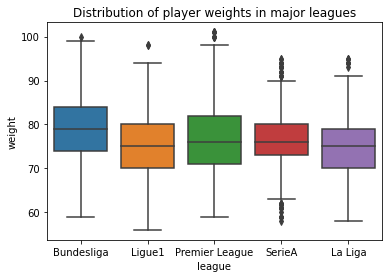

In [9]:
sns.boxplot(data = player_data, x = 'league', y='weight')
plt.title('Distribution of player weights in major leagues');

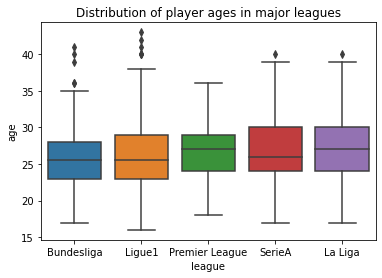

In [10]:
sns.boxplot(data = player_data, x = 'league', y='age')
plt.title('Distribution of player ages in major leagues');

In [11]:
# analyse by country
nationalities = ['Spain', 'France', 'Germany', 'Italy', 'England']
country_specific_player_data = player_data[player_data['nationality'].isin(nationalities)]

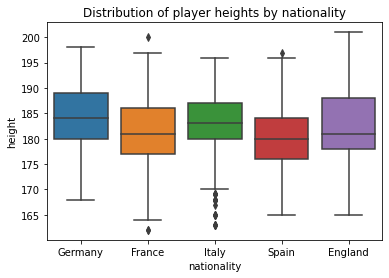

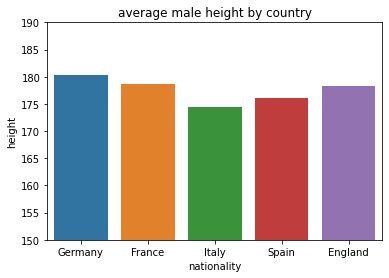

In [12]:
sns.boxplot(data = country_specific_player_data, x = 'nationality', y='height')
plt.title('Distribution of player heights by nationality');
plt.show()

# average height in country
# from https://worldpopulationreview.com/country-rankings/average-height-by-country
avg_heights = pd.DataFrame({'nationality': nationalities, 'height': [176.11, 178.60,180.28,174.42,178.21]})
sns.barplot(x = 'nationality', y='height', data = avg_heights, order = ['Germany', 'France', 'Italy', 'Spain','England'])
plt.title('average male height by country');
plt.ylim((150,190));


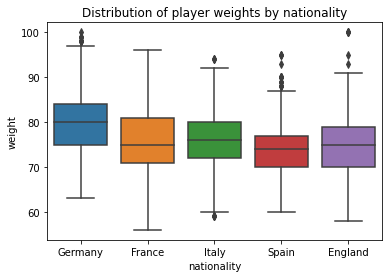

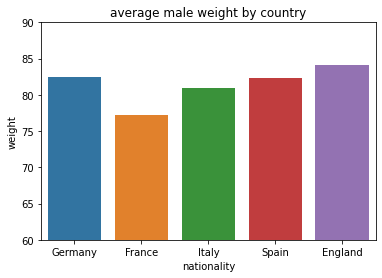

In [13]:
sns.boxplot(data = country_specific_player_data, x = 'nationality', y='weight')
plt.title('Distribution of player weights by nationality');
plt.show()

# average weight in country
# from https://w3ask.com/average-weight-men-world/
avg_weights = pd.DataFrame({'nationality': nationalities, 'weight': [82.3, 77.2,82.5,81,84.1]})
sns.barplot(x = 'nationality', y='weight', data = avg_weights, order = ['Germany', 'France', 'Italy', 'Spain','England'])
plt.title('average male weight by country');
plt.ylim((60,90));

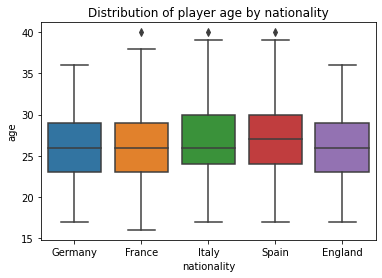

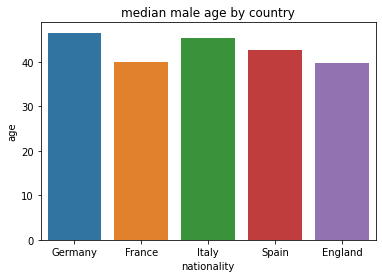

In [14]:
sns.boxplot(data = country_specific_player_data, x = 'nationality', y='age')
plt.title('Distribution of player age by nationality');
plt.show()

# from https://worldpopulationreview.com/country-rankings/median-age
avg_ages = pd.DataFrame({'nationality': nationalities, 'age': [42.7, 40, 46.5, 45.4, 39.6]})
sns.barplot(x = 'nationality', y='age', data = avg_ages, order = ['Germany', 'France', 'Italy', 'Spain','England'])
plt.title('median male age by country');


In [36]:
country_data = {}
for country in player_data.nationality.unique():
    temp = player_data[player_data['nationality'] == country]
    average_height = round(temp.height.mean(),2)
    average_weight = round(temp.weight.mean(),2)
    average_age = round(temp.age.mean(),2)
    print("{} has average height: {}, average weight {}, average age {}, for {} players".format(country, average_height, average_weight, average_age, len(temp)))
    if len(temp) > 25:
        country_data[country] = (average_height, average_weight, average_age)
          

Poland has average height: 186.45, average weight 79.42, average age 26.61, for 67 players
Germany has average height: 184.34, average weight 79.8, average age 26.08, for 557 players
Switzerland has average height: 183.69, average weight 79.35, average age 26.92, for 86 players
Brazil has average height: 180.79, average weight 75.28, average age 26.4, for 225 players
Netherlands has average height: 183.34, average weight 77.73, average age 25.83, for 122 players
Austria has average height: 183.53, average weight 79.49, average age 25.74, for 85 players
Bosnia and Herzegovina has average height: 185.69, average weight 79.84, average age 29.22, for 32 players
Peru has average height: 179.91, average weight 74.18, average age 30.91, for 11 players
Argentina has average height: 181.56, average weight 77.36, average age 27.42, for 205 players
Turkey has average height: 182.89, average weight 77.16, average age 23.86, for 44 players
Côte d'Ivoire has average height: 181.86, average weight 74

<Figure size 1008x720 with 0 Axes>

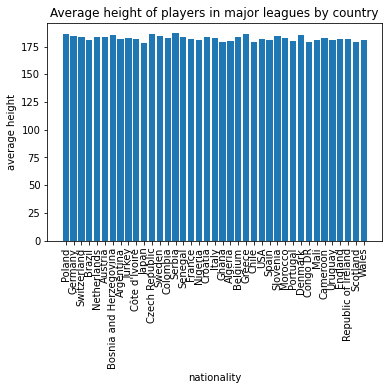

<Figure size 1008x720 with 0 Axes>

In [40]:
plt.bar(list(country_data.keys()), list(map(lambda x: x[0], country_data.values())))
plt.xticks(rotation = 90);
plt.title("Average height of players in major leagues by country")
plt.ylabel("average height")
plt.xlabel("nationality")
plt.figure(figsize=(14, 10));

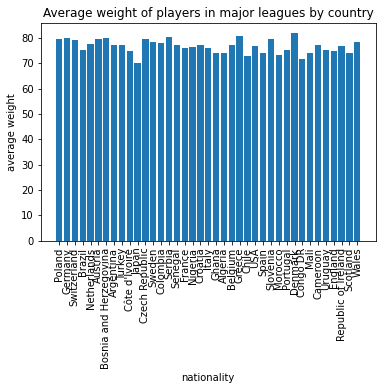

<Figure size 1008x720 with 0 Axes>

In [41]:
plt.bar(list(country_data.keys()), list(map(lambda x: x[1], country_data.values())))
plt.xticks(rotation = 90);
plt.title("Average weight of players in major leagues by country")
plt.ylabel("average weight")
plt.xlabel("nationality")
plt.figure(figsize=(14, 10));

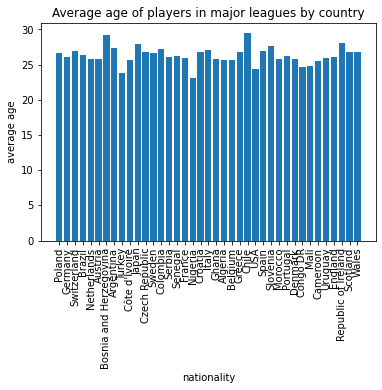

<Figure size 57600x43200 with 0 Axes>

In [43]:
plt.bar(list(country_data.keys()), list(map(lambda x: x[2], country_data.values())))
plt.xticks(rotation = 90);
plt.title("Average age of players in major leagues by country")
plt.ylabel("average age")
plt.xlabel("nationality")
plt.figure(figsize=(14, 10));